In [1]:
import os
import sonia
from sonnia.sonia import Sonia
from sonnia.sonia_paired import SoniaPaired
from sonia.plotting import Plotter
from sonnia.processing import Processing
import sonia
import numpy as np
import pandas as pd

# define and infer model

In [4]:
data_seqs=np.loadtxt('data_seqs_paired.txt',dtype=str)
qm = SoniaPaired(data_seqs=data_seqs,ppost_model='humanTCR')

2025-10-02 11:19:37,553: Adding data seqs.
2025-10-02 11:19:37,571: Using default index (0) for amino acid CDR3 sequences.
2025-10-02 11:19:37,572: Using default index (1) for V genes.
2025-10-02 11:19:37,576: Using default index (2) for J genes.
2025-10-02 11:19:37,611: 100000 sequences before filtering. Using /home/ec2-user/soNNia/sonnia/default_models/human_T_beta_alpha/heavy_chain for filtering.
2025-10-02 11:19:37,726: 100000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-10-02 11:19:37,732: 100000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-10-02 11:19:37,757: 100000 sequences remain after removing data which are unproductive amino acid sequences.
2025-10-02 11:19:37,806: 100000 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'].
2025

In [4]:
# add generated sequences (you can add them from file too, more is better.)
qm.add_generated_seqs(int(2e5)) 

2025-10-02 08:44:14,775: Generating 200000 using the light pgen model in /home/ec2-user/soNNia/sonnia/default_models/human_T_beta_alpha/light_chain and the heavy pgen model in /home/ec2-user/soNNia/sonnia/default_models/human_T_beta_alpha/heavy_chain.
2025-10-02 08:44:16,785: Adding gen seqs.
2025-10-02 08:44:16,857: Using default index (0) for amino acid CDR3 sequences.
2025-10-02 08:44:16,858: Using default index (1) for V genes.
2025-10-02 08:44:16,865: Using default index (2) for J genes.
2025-10-02 08:44:16,935: 200000 sequences before filtering. Using /home/ec2-user/soNNia/sonnia/default_models/human_T_beta_alpha/heavy_chain for filtering.
2025-10-02 08:44:17,165: 200000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-10-02 08:44:17,177: 200000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-10-02 08:44:17,227: 200000 sequences remain after removing data which are unproductive amino acid sequences.


In [5]:
#define and train model
qm.infer_selection(epochs=30,batch_size=int(1e4))

2025-10-02 08:45:13,054: Finished training.
Computing energies: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]
2025-10-02 08:45:14,084: Updating marginals.
Computing energies: 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]
2025-10-02 08:45:15,178: Finished updating marginals.


# Do some plotting

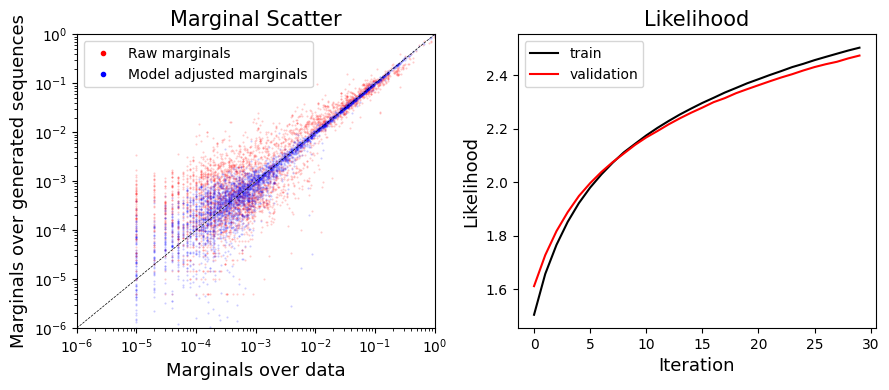

In [6]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

# Generate sequences

In [7]:
pre_seqs=qm.generate_sequences_pre(int(1e4),nucleotide=False)
pre_seqs[:3]

array([['CASSYSRDGSYSNQPQHF', 'TRBV6-3', 'TRBJ1-5', 'CAAAGANNLFF',
        'TRAV23/DV6', 'TRAJ36'],
       ['CASSLPGGRTDTQYF', 'TRBV12-3', 'TRBJ2-3', 'CAMREGRGNYGQNFVF',
        'TRAV14/DV4', 'TRAJ26'],
       ['CASSLDGRSYEQYF', 'TRBV7-4', 'TRBJ2-7', 'CLVGKAAGNKLTF', 'TRAV4',
        'TRAJ17']], dtype='<U81')

In [8]:
post_seqs=qm.generate_sequences_post(int(1e4),nucleotide=False)
post_seqs[:5]

Computing energies: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


array([['CASSQPVRYQPQHF', 'TRBV4-2', 'TRBJ1-5', 'CAAGNTGGFKTIF', 'TRAV2',
        'TRAJ9'],
       ['CSVEALLQGTSPLHF', 'TRBV29-1', 'TRBJ1-6', 'CAARRYSSASKIIF',
        'TRAV13-1', 'TRAJ3'],
       ['CASSEPEMTLPTEAFF', 'TRBV2', 'TRBJ1-1', 'CAVPGANSKLTF',
        'TRAV12-2', 'TRAJ56'],
       ['CATQDRGMRELFF', 'TRBV19', 'TRBJ2-2', 'CIVRVDTGGFKTIF',
        'TRAV26-1', 'TRAJ9'],
       ['CASSSTITPQGTEAFF', 'TRBV11-2', 'TRBJ1-1', 'CPAGANSKLTF',
        'TRAV12-3', 'TRAJ56']], dtype='<U90')

# Evaluate sequences

In [9]:
Q_data,pgen_data,ppost_data=qm.evaluate_seqs(qm.data_seqs[:int(1e4)].values)
Q_gen,pgen_gen,ppost_gen=qm.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=qm.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

Computing energies: 100%|██████████| 1/1 [00:00<00:00, 18.35it/s]


[3.8980644  0.79195344 0.38572186]
[4.33802954e-16 1.46780823e-17 7.73270742e-20]
[1.69099184e-15 1.16243578e-17 2.98267431e-20]


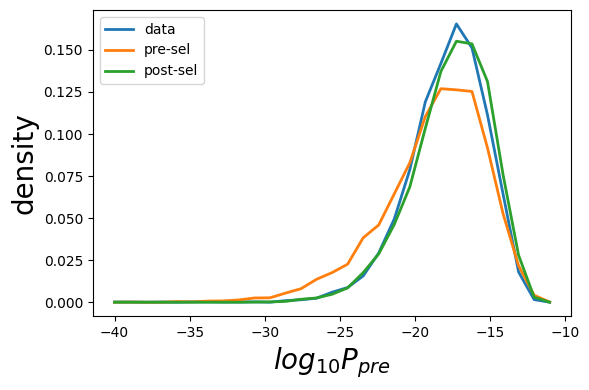

In [10]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}',bin_min=-40,bin_max=-10)

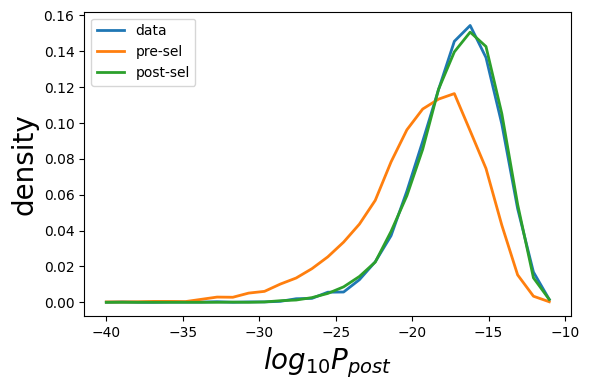

In [11]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}',bin_min=-40,bin_max=-10)

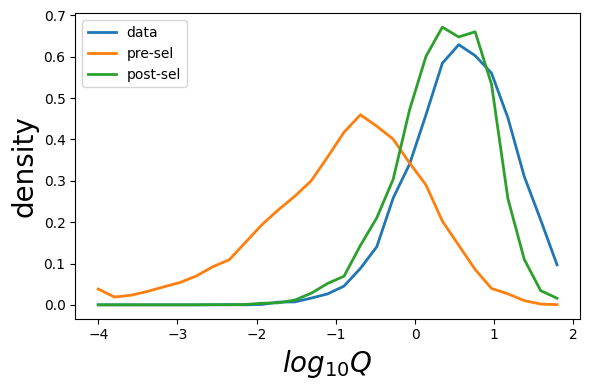

In [12]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

# some utils inherited from OLGA

In [13]:
# olga functionality can be directly accessed throu2gh the main SoNNia model

In [14]:
qm.seqgen_model_light.gen_rnd_prod_CDR3(),qm.seqgen_model_heavy.gen_rnd_prod_CDR3()

(('TGTGCTCTGAAGGAAACTGGGGCAAACAACCTCTTCTTT', 'CALKETGANNLFF', 25, 34),
 ('TGTGCCAGCAGCGGGAGTAGGGGCGAGCAGTACTTC', 'CASSGSRGEQYF', 73, 13))

In [15]:
qm.genomic_data_light.genJ[1],qm.genomic_data_heavy.genJ[1]

(['TRAJ10*01',
  'ATACTCACGGGAGGAGGAAACAAACTCACCTTT',
  'ATACTCACGGGAGGAGGAAACAAACTCACCTTTGGGACAGGCACTCAGCTAAAAGTGGAACTCA'],
 ['TRBJ1-2*01',
  'CTAACTATGGCTACACCTTC',
  'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG'])

In [16]:
qm.pgen_model_heavy.PinsDJ,qm.pgen_model_light.PinsVJ

(array([7.19554e-02, 5.63345e-02, 8.55143e-02, 1.27028e-01, 1.21860e-01,
        1.08232e-01, 8.59492e-02, 7.45618e-02, 5.07897e-02, 3.88103e-02,
        3.57069e-02, 2.68135e-02, 2.15603e-02, 1.95199e-02, 1.66126e-02,
        1.44175e-02, 1.02015e-02, 9.54077e-03, 7.30822e-03, 5.44689e-03,
        4.32498e-03, 2.46807e-03, 1.75657e-03, 9.34188e-04, 5.72187e-04,
        7.20642e-04, 4.44661e-04, 1.06769e-04, 7.10554e-05, 3.08047e-04,
        1.29150e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([2.80720e-02, 3.70881e-02, 7.18272e-02, 1.11361e-01, 1.45677e-01,
        1.17451e-01, 9.39653e-02, 8.25969e-02, 7.71960e-02, 5.37416e-02,
        4.99160e-02, 3.79668e-02, 2.58719e-02, 1.95766e-02, 1.36449e-02,
        8.74302e-03, 5.57685e-03, 3.94724e-03, 2.88705e-03, 1.72847e-03,
        1.77234e-03, 1.44091e-03, 1.39968e-03, 1.40263e-03, 1.25466e-03,
        6.01223e-04, 1.11938e-03, 7.01411e-04, 3.20548e-04, 2.40517e-04,
        3.74385e-05, 8.82230e-05, 8.38335e-05, 1.

# Save and Load Model

In [17]:
qm.save_model('test_paired')

In [18]:
qm_new=SoniaPaired(ppost_model='test_paired')

In [19]:
# By default sequences are not added. Adding them now.
qm_new.update_model(add_data_seqs=qm.data_seqs,add_gen_seqs=qm.gen_seqs)

2025-10-02 08:46:34,535: Adding data seqs.
2025-10-02 08:46:34,573: Using default index (0) for amino acid CDR3 sequences.
2025-10-02 08:46:34,573: Using default index (1) for V genes.
2025-10-02 08:46:34,577: Using default index (2) for J genes.
2025-10-02 08:46:34,611: 99986 sequences before filtering. Using test_paired/heavy_chain for filtering.
2025-10-02 08:46:34,723: 99986 sequences remain after removing sequences with V genes inconsistent with the model.
2025-10-02 08:46:34,729: 99986 sequences remain after removing sequences with J genes inconsistent with the model.
2025-10-02 08:46:34,754: 99986 sequences remain after removing data which are unproductive amino acid sequences.
2025-10-02 08:46:34,803: 99986 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'].
2025-10-02 08:46:34,822: 99986 sequences remain after removi

In [20]:
# Continue inference
qm_new.infer_selection(epochs=5)
qm_new.learning_history.history

2025-10-02 08:46:53,528: Finished training.
Computing energies: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]
2025-10-02 08:46:54,546: Updating marginals.
Computing energies: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]
2025-10-02 08:46:55,629: Finished updating marginals.


{'_likelihood': [-1.7437752485275269,
  -1.7584666013717651,
  -1.7712494134902954,
  -1.7831312417984009,
  -1.7953401803970337],
 'binary_crossentropy': [0.35272881388664246,
  0.35092583298683167,
  0.349362850189209,
  0.3478928804397583,
  0.34652701020240784],
 'loss': [0.3527287244796753,
  0.35092565417289734,
  0.34936314821243286,
  0.3478921949863434,
  0.34652721881866455],
 'val__likelihood': [-1.7539877891540527,
  -1.7619825601577759,
  -1.7720454931259155,
  -1.7804862260818481,
  -1.7882341146469116],
 'val_binary_crossentropy': [0.3514096736907959,
  0.3502010107040405,
  0.3490906059741974,
  0.34801459312438965,
  0.346938818693161],
 'val_loss': [0.3514097034931183,
  0.3502011001110077,
  0.34909066557884216,
  0.34801462292671204,
  0.3469388484954834]}

# Compute Diversity and Distance from Reference Distribution

In [21]:
print('model entropy is: ', qm_new.entropy(), '[bits]')

Computing energies: 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]
2025-10-02 08:47:22,468: 2 sequences have zero Pgen, we remove them in the evaluation of the entropy


model entropy is:  56.64131738057569 [bits]


In [22]:
print('Dkl post gen is: ', qm_new.dkl_post_gen(), '[bits]')

Dkl post gen is:  2.071693 [bits]
